## Q1) Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data set
df=pd.read_csv("C:\\Users\\mihir\\50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#### Perform EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
df[df.duplicated()].shape  # check duplicated rows

(0, 5)

In [6]:
#rename the columns
df=df.rename({'R&D Spend':'r_d','Administration':'admi','Marketing Spend':'m_s','State':'st','Profit':'pf',},axis=1)
df.head()

,r_d,admi,m_s,st,pf
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


{'whiskers': [<matplotlib.lines.Line2D at 0x1aa5875c550>,
 'caps': [<matplotlib.lines.Line2D at 0x1aa5875cc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aa5875c1f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1aa5876a310>],
 'fliers': [<matplotlib.lines.Line2D at 0x1aa5876a670>],
 'means': []}

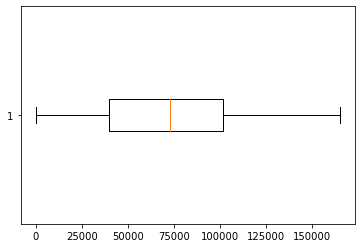

In [7]:
plt.boxplot(df['r_d'],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1aa5980aa00>,
 'caps': [<matplotlib.lines.Line2D at 0x1aa59818100>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aa5980a6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1aa59818700>],
 'fliers': [<matplotlib.lines.Line2D at 0x1aa59818a60>],
 'means': []}

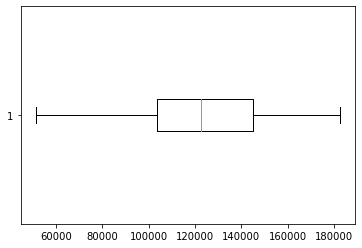

In [8]:
plt.boxplot(df['admi'],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1aa598709a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1aa5987d0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aa59870640>],
 'medians': [<matplotlib.lines.Line2D at 0x1aa5987d760>],
 'fliers': [<matplotlib.lines.Line2D at 0x1aa5987dac0>],
 'means': []}

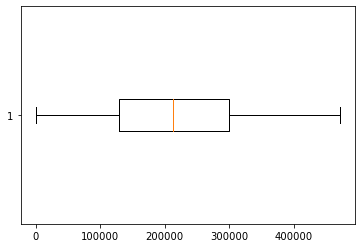

In [9]:
plt.boxplot(df['m_s'],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1aa598cafd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1aa598d76d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aa598cac70>],
 'medians': [<matplotlib.lines.Line2D at 0x1aa598d7dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1aa598e3160>],
 'means': []}

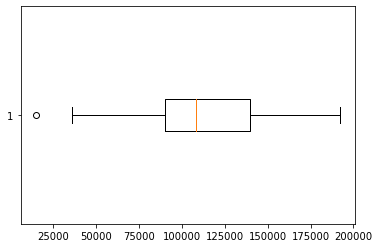

In [10]:
plt.boxplot(df['pf'],vert=False)

<AxesSubplot:>

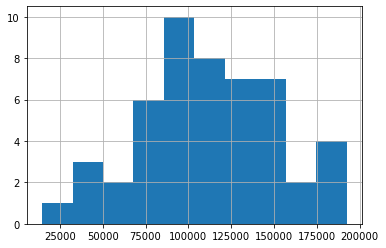

In [11]:
df['pf'].hist()

In [12]:
#Remove "st" column
df=df.drop(['st'],axis=1)
df.head()

,r_d,admi,m_s,pf
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


### Transformations

In [13]:
#Data standardized
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data=scaler.fit_transform(df)
data=pd.DataFrame(data,index=df.index,columns=df.columns)
data.head()

,r_d,admi,m_s,pf
0,2.016411,0.560753,2.153943,2.011203
1,1.955860,1.082807,1.923600,1.999430
2,1.754364,-0.728257,1.626528,1.980842
3,1.554784,-0.096365,1.422210,1.776627
4,1.504937,-1.079919,1.281528,1.357740


In [14]:
#check correlatin matrix
data.corr()

,r_d,admi,m_s,pf
r_d,1.000000,0.241955,0.724248,0.972900
admi,0.241955,1.000000,-0.032154,0.200717
m_s,0.724248,-0.032154,1.000000,0.747766
pf,0.972900,0.200717,0.747766,1.000000


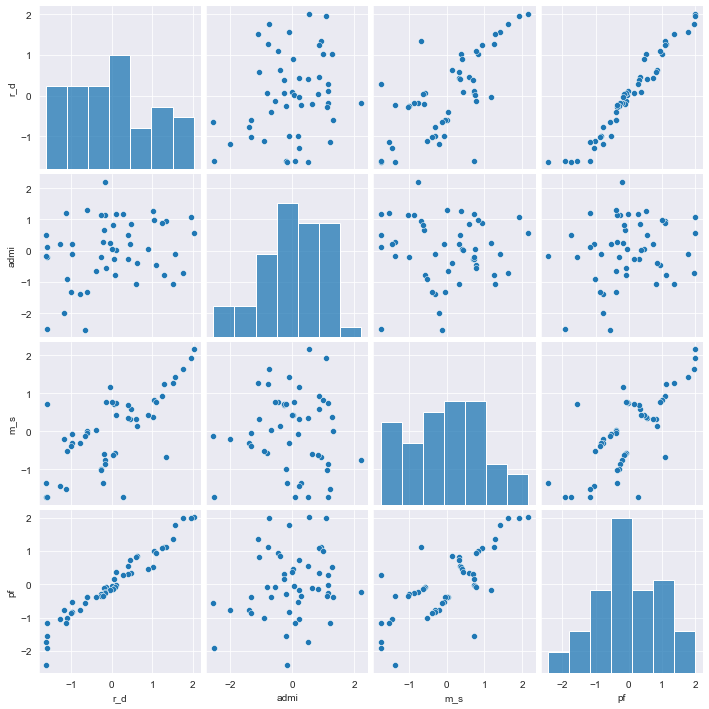

In [15]:
#scatter plot for ckecking correlatins
sns.set_style(style='darkgrid')
sns.pairplot(data)

### Prepare a model

In [16]:
#Build a model
import statsmodels.formula.api as smf
model=smf.ols('pf~r_d+admi+m_s',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pf   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           4.53e-30
Time:                        14:19:05   Log-Likelihood:                 4.3222
No. Observations:                  50   AIC:                           -0.6444
Df Residuals:                      46   BIC:                             7.004
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.204e-16      0.033  -1.59e-14      1.000      -0.066       0.066
r_d            0.9176      0.051     17.846      0.000       0.814       1.021
admi          -0.0186      0.035     -0.526      0.602      -0.090       0.053
m_s            0.0826      0.050      1.655      0.105      -0.018       0.183
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                         2.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### p values of "admi" and "m_s" >0.05 so check collinearity

In [17]:
#Simple Linear regression
ml_admi=smf.ols('pf~admi',data=data).fit()
#t and p values
(ml_admi.tvalues,ml_admi.pvalues)

(Intercept   -3.680455e-15
 admi         1.419493e+00
 dtype: float64,
 Intercept    1.000000
 admi         0.162217
 dtype: float64)

In [18]:
ml_m_s=smf.ols('pf~m_s',data=data).fit()
#t and p values
(ml_m_s.tvalues,ml_m_s.pvalues)

(Intercept   -5.430358e-15
 m_s          7.802657e+00
 dtype: float64,
 Intercept    1.000000e+00
 m_s          4.381073e-10
 dtype: float64)

In [19]:
# admi and m_s
ml_a_m=smf.ols('pf~admi+m_s',data=data).fit()
(ml_a_m.tvalues,ml_a_m.pvalues)

(Intercept   -5.711023e-15
 admi         2.467779e+00
 m_s          8.281039e+00
 dtype: float64,
 Intercept    1.000000e+00
 admi         1.729198e-02
 m_s          9.727245e-11
 dtype: float64)

In [20]:
#calculate VIF(variance inflation factor)
rsq_r_d=smf.ols('r_d~admi+m_s',data=data).fit().rsquared
vif_r_d=1/(1-rsq_r_d)
rsq_admi=smf.ols('admi~r_d+m_s',data=data).fit().rsquared
vif_admi=1/(1-rsq_admi)
rsq_m_s=smf.ols('m_s~admi+r_d',data=data).fit().rsquared
vif_m_s=1/(1-rsq_m_s)
d1={'variables':['r_d','admi','m_s'],'VIF':[vif_r_d,vif_admi,vif_m_s]}
vif_frame=pd.DataFrame(d1)
vif_frame

,variables,VIF
0,r_d,2.468903
1,admi,1.175091
2,m_s,2.326773


### Residual analysis

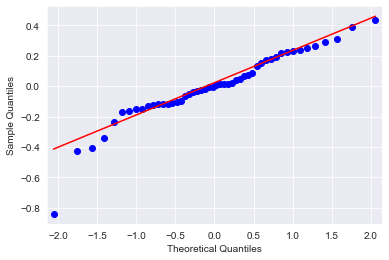

In [21]:
# Test fon Normality of resid (Q-Q plot)
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')

In [22]:
list(np.where(model.resid<-.5))

[array([49], dtype=int64)]

In [23]:
list(np.where(model.resid>.5))

[array([], dtype=int64)]

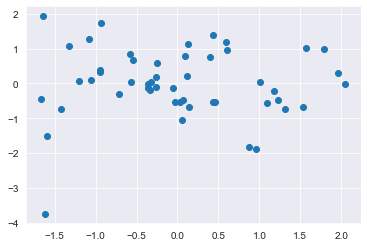

In [24]:
#error vs fitted values
def set_standardized_values (vals):
    return (vals-vals.mean())/vals.std()
plt.scatter(set_standardized_values(model.fittedvalues),set_standardized_values(model.resid))
plt.show()

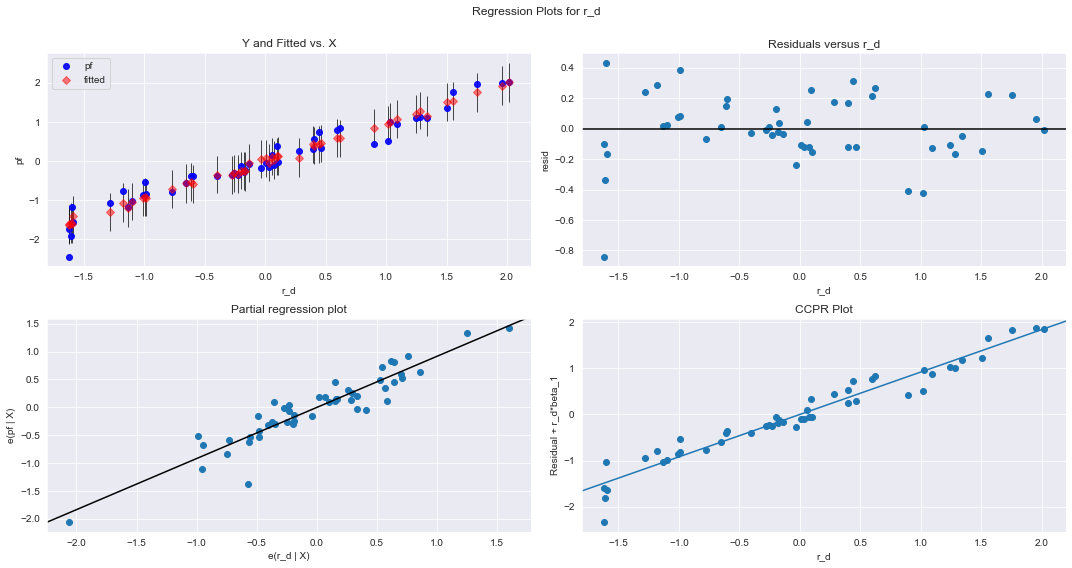

In [25]:
#error vs regressions(indivisuals)
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"r_d",fig=fig)

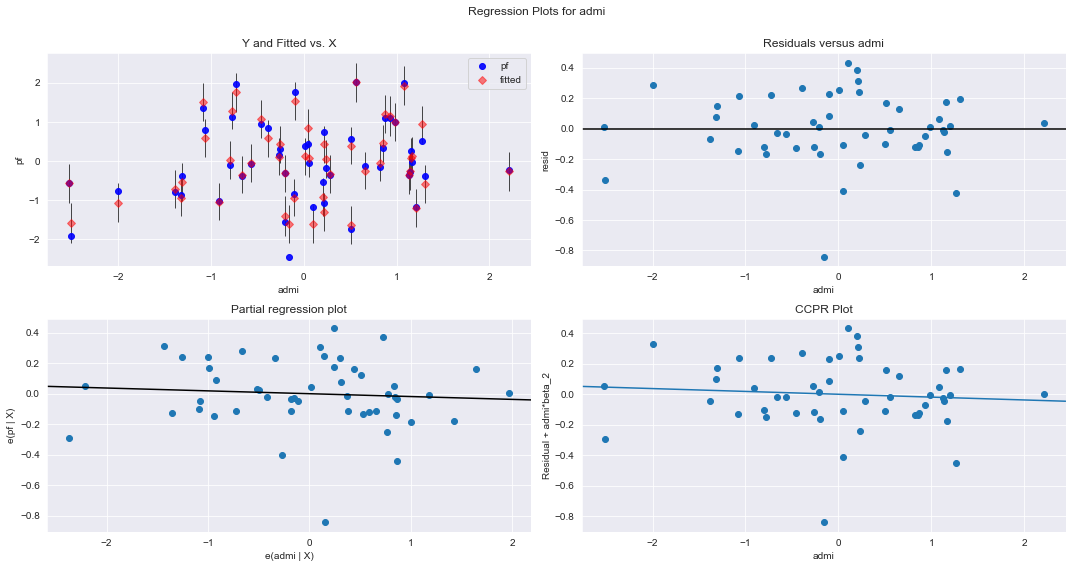

In [26]:
#error vs regressions(indivisuals)
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"admi",fig=fig)

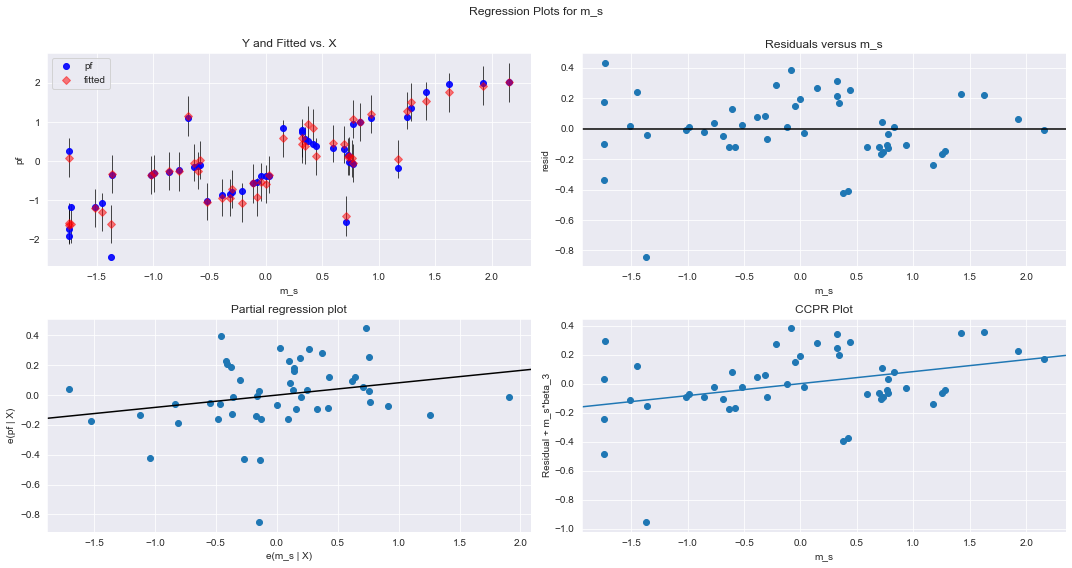

In [27]:
#error vs regressions(indivisuals)
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"m_s",fig=fig)

### Cook's Distances

<StemContainer object of 3 artists>

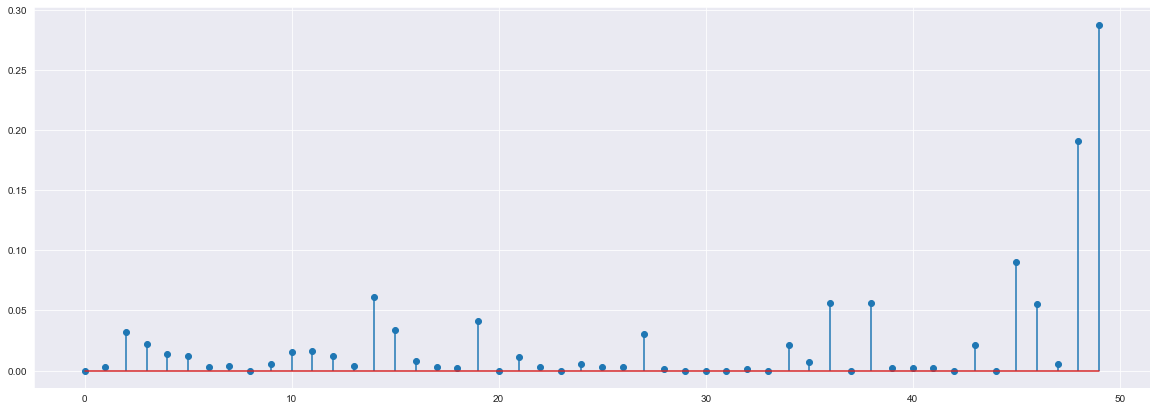

In [28]:
from statsmodels.graphics.regressionplots import influence_plot
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,3))

In [29]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432684)

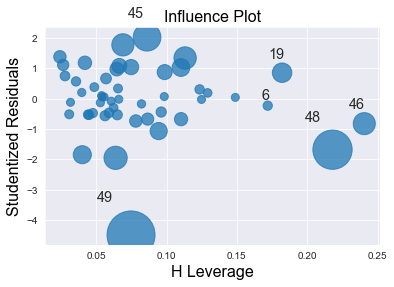

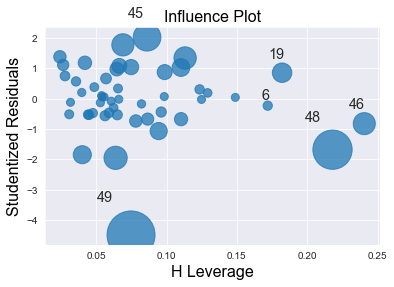

In [30]:
#influence plot
influence_plot(model)

In [31]:
k=data.shape[1]  #no. of inputs
n=data.shape[0]  #no. of obs
leverage_cutoff=3*(k+1)/n
leverage_cutoff

0.3

##### We see that no influences/outliers

In [32]:
data[data.index.isin([49])]

,r_d,admi,m_s,pf
49,-1.622362,-0.157226,-1.369985,-2.439313


In [33]:
data.head()

,r_d,admi,m_s,pf
0,2.016411,0.560753,2.153943,2.011203
1,1.955860,1.082807,1.923600,1.999430
2,1.754364,-0.728257,1.626528,1.980842
3,1.554784,-0.096365,1.422210,1.776627
4,1.504937,-1.079919,1.281528,1.357740


In [34]:
data=data.drop(data.index[[49]],axis=0).reset_index()

In [35]:
data=data.drop(['index'],axis=1)
data.tail()

,r_d,admi,m_s,pf
44,-1.134305,1.206419,-1.509074,-1.173209
45,-1.600350,0.101254,-1.727400,-1.180082
46,-1.593413,-0.199322,0.711122,-1.566922
47,-1.622362,0.507722,-1.743127,-1.740627
48,-1.610433,-2.509409,-1.743127,-1.913212


In [36]:
#Again build a model
final_ml=smf.ols('pf~r_d+admi+m_s',data=data).fit()
final_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pf   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           8.85e-32
Time:                        14:19:35   Log-Likelihood:                 12.831
No. Observations:                  49   AIC:                            -17.66
Df Residuals:                      45   BIC:                            -10.09
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0182      0.028      0.654      0.516      -0.038       0.074
r_d            0.8917      0.044     20.470      0.000       0.804       0.979
admi          -0.0154      0.030     -0.518      0.607      -0.075       0.045
m_s            0.0766      0.042      1.825      0.075      -0.008       0.161
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                         2.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
d={'Parameters':['R^2','R^2_adj','AIC'],'Model Values':[model.rsquared,model.rsquared_adj,model.aic],'Final Model values':[final_ml.rsquared,final_ml.rsquared_adj,final_ml.aic]}

In [38]:
table=pd.DataFrame(d)
table

,Parameters,Model Values,Final Model values
0,R^2,0.950746,0.961316
1,R^2_adj,0.947534,0.958737
2,AIC,-0.644375,-17.662259


### Predict for new data point

In [39]:
newdata=pd.DataFrame({'r_d':75000,'admi':120000,'m_s':220000},index=[1])
newdata

,r_d,admi,m_s
1,75000,120000,220000


In [40]:
final_ml.predict(newdata)

1    81869.70972
dtype: float64

In [175]:
y=np.array(data['pf'])

In [176]:
#we can pass whole data
y_pred=final_ml.predict(data)

In [177]:
#check RMSE value
import sklearn.metrics as mt
mse=mt.mean_squared_error(y,y_pred)
rmse=np.sqrt(mse)  #mse**(0.5)
rmse

0.1862252492700135